<a href="https://colab.research.google.com/github/MagnoSales/TelecomX_Desafio/blob/main/TelecomX_BR_DataVizz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle


In [251]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [252]:
telecomx_bruto = pd.read_json(url)

In [253]:
telecomx_bruto

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [254]:
telecomx_bruto.to_json('dados_telecomx_bruto.json') #cópia de segurança off line

In [255]:
nome_colunas_bruto = list(telecomx_bruto.columns)
nome_colunas_bruto

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [256]:
telecomx_bruto.shape

(7267, 6)

#🔧 Transformação

#Expandir as colunas - Dicionarios

In [257]:
customer_expandido = pd.json_normalize(telecomx_bruto['customer'])

In [258]:
phone_expandido = pd.json_normalize(telecomx_bruto['phone'])

In [259]:
internet_expandido = pd.json_normalize(telecomx_bruto['internet'])

In [260]:
account_expandido = pd.json_normalize(telecomx_bruto['account'])

#Juntar todos os dataframes expandidos

In [261]:
telecomx_expandido = pd.concat([
    telecomx_bruto[['customerID', 'Churn']],
    customer_expandido, phone_expandido, internet_expandido, account_expandido], axis=1).copy()
telecomx_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#Renomear nomes de colunas com caracteres especiais

In [262]:
telecomx_expandido = telecomx_expandido.rename(columns={'Charges.Monthly':'ChargesMonthly', 'Charges.Total':'ChargesTotal',
                                                }).copy()
telecomx_expandido.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [263]:
telecomx_expandido.shape

(7267, 21)

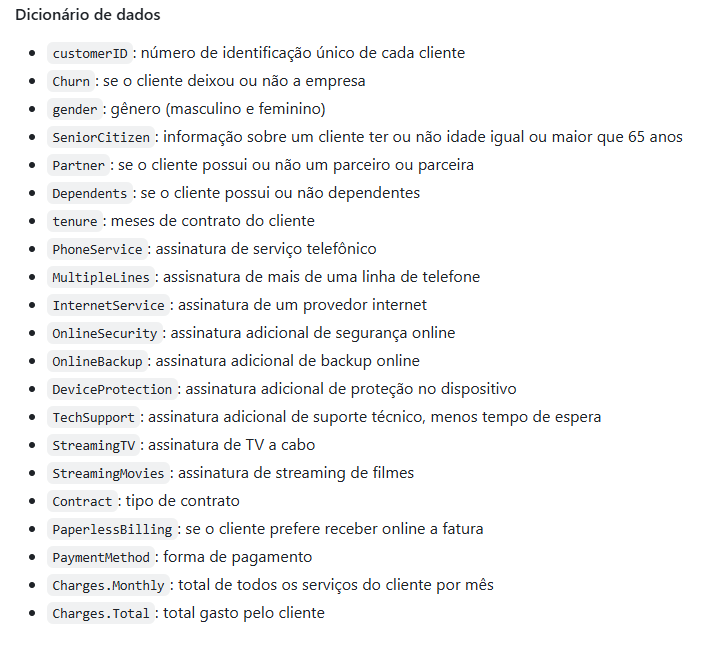

In [264]:
telecomx_expandido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#Verificar se há valores nulos

In [265]:
telecomx_expandido.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#Analisar o conteúdo dos campos para correções

#Corrigir valores vazios, zerados, NaN, None,... e verificar se o conteúdo dos campos está padronizado, se não, padronizar.

In [266]:
telecomx_expandido['Churn'].unique().tolist()

['No', 'Yes', '']

In [267]:
telecomx_expandido['gender'].unique().tolist()

['Female', 'Male']

In [268]:
telecomx_expandido['SeniorCitizen'].unique().tolist()

[0, 1]

In [269]:
telecomx_expandido['Partner'].unique().tolist()

['Yes', 'No']

In [270]:
telecomx_expandido['Dependents'].unique().tolist()

['Yes', 'No']

In [271]:
telecomx_expandido['tenure'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [272]:
telecomx_expandido['PhoneService'].unique().tolist()

['Yes', 'No']

In [273]:
telecomx_expandido['MultipleLines'].unique().tolist()

['No', 'Yes', 'No phone service']

In [274]:
telecomx_expandido['InternetService'].unique().tolist()

['DSL', 'Fiber optic', 'No']

In [275]:
telecomx_expandido['OnlineSecurity'].unique().tolist()

['No', 'Yes', 'No internet service']

In [276]:
telecomx_expandido['OnlineBackup'].unique().tolist()

['Yes', 'No', 'No internet service']

In [277]:
telecomx_expandido['DeviceProtection'].unique().tolist()

['No', 'Yes', 'No internet service']

In [278]:
telecomx_expandido['TechSupport'].unique().tolist()

['Yes', 'No', 'No internet service']

In [279]:
telecomx_expandido['StreamingTV'].unique().tolist()

['Yes', 'No', 'No internet service']

In [280]:
telecomx_expandido['StreamingMovies'].unique().tolist()

['No', 'Yes', 'No internet service']

In [281]:
telecomx_expandido['Contract'].unique().tolist()

['One year', 'Month-to-month', 'Two year']

In [282]:
telecomx_expandido['PaperlessBilling'].unique().tolist()

['Yes', 'No']

In [283]:
telecomx_expandido['PaymentMethod'].unique().tolist()

['Mailed check',
 'Electronic check',
 'Credit card (automatic)',
 'Bank transfer (automatic)']

In [284]:
telecomx_expandido[telecomx_expandido['ChargesMonthly'].isin(['',' ', 'nan', 'None',0])]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal


In [285]:
telecomx_expandido[telecomx_expandido['ChargesTotal'].isin([' ',''])]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [286]:
telecomx_expandido['ChargesTotal'].describe()

,ChargesTotal
count,7267
unique,6531
top,20.2
freq,11


#limpar espaços em branco nos campos

In [287]:
telecomx_expandido[telecomx_expandido['Churn'].isin([''])].sort_values(by='ChargesTotal')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
1764,2508-QJJFP,,Male,0,No,Yes,47,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.55,1013.05
4778,6547-ETRKK,,Female,0,Yes,No,53,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.80,1021.8
1172,1676-BZZYV,,Male,0,Yes,Yes,55,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.50,1026.35
3300,4603-FDONU,,Female,0,Yes,Yes,32,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,35.15,1051.05
3202,4471-OIIDG,,Female,0,No,No,10,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.60,1060.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7049,9708-TKNTZ,,Female,0,Yes,Yes,6,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.70,94.45
3207,4477-QAXWD,,Male,0,Yes,No,25,No,No phone service,DSL,...,No,Yes,No,Yes,No,One year,Yes,Credit card (automatic),38.10,970.4
2245,3134-JCVOE,,Female,0,No,No,3,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,No,Mailed check,29.20,98.5
540,0769-WXZYU,,Male,0,No,No,34,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),26.10,980.35


Comentario: #Substituir campo nulo por 'No'. Por quê? Entendo que impossível ser 'Yes' por que o tema churn é muito sensível, e seria uma falha muito grave não apontar. Por exemplo, continuidade da cobrança.

In [288]:
telecomx_expandido['Churn'] = telecomx_expandido['Churn'].replace(['', 'nan', 'None'], 'No')

In [289]:
telecomx_expandido['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Comentario: Mantive os valores de tenure == 0, supondo que se tratam de clientes com menos de 1 mês de base. Em vista inclusive tendo em vista quer o valor da cobrança total está vazio, ou igual a zero.

In [290]:
telecomx_expandido[telecomx_expandido['tenure'].isin([0])]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [291]:
telecomx_expandido[telecomx_expandido['ChargesTotal'].isin([' ', 'nan', 'None'])].reset_index(drop=True)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
2,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
3,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
4,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
5,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
6,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
7,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
8,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
9,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [292]:
#usando método where para subistituir os valores vazios dos valores totais pela multiplicação de tenure x cobrança mensal
telecomx_expandido['ChargesTotal'] = np.where(
    telecomx_expandido['ChargesTotal'].str.strip() == '',
    telecomx_expandido['tenure'] * telecomx_expandido['ChargesMonthly'],
    telecomx_expandido['ChargesTotal'])

In [293]:
telecomx_expandido[telecomx_expandido['ChargesTotal'].isin([0])].reset_index(drop=True)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
2,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
3,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
4,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
5,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
6,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
7,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
8,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
9,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


In [294]:
telecomx_expandido[telecomx_expandido['ChargesTotal'].isin(['',' ', 'nan', 'None'])]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal


#Transformar 'Charges.Total' em float


In [295]:
telecomx_expandido['ChargesTotal'] = telecomx_expandido['ChargesTotal'].astype(np.float64)
telecomx_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [296]:
telecomx_expandido['ChargesTotal'].describe()

,ChargesTotal
count,7267.000000
mean,2277.182035
std,2268.648587
min,0.000000
25%,396.200000
50%,1389.200000
75%,3778.525000
max,8684.800000


In [297]:
telecomx_expandido.columns = telecomx_expandido.columns.str.strip() #limpar os espaços em branco das colunas

In [298]:
telecomx_expandido.drop_duplicates() #extrair duplicidades

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [299]:
telecomx_expandido.shape

(7267, 21)

In [300]:
telecomx_expandido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#Criando um novo dataframe para iniciar a análise

In [301]:
df_telecomx = telecomx_expandido.copy().reset_index(drop=True)

In [302]:
df_telecomx

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#📊 Carga e análise

#Proporção de churn na base

In [303]:
#Proporção de churn na base
churn_percentual = round(df_telecomx['Churn'].value_counts(normalize=True) * 100,2)
print(f'Abertura do percentual de churn da Base:\n{churn_percentual}')

Abertura do percentual de churn da Base:
Churn
No     74.28
Yes    25.72
Name: proportion, dtype: float64


Comentário:
O percentual de churn da base é de 25,72%

In [304]:
#Churn por gênero
churn_gender = round(df_telecomx[['Churn','gender']].value_counts(normalize=True) * 100,2)
pt_churn_gender = churn_gender.loc[('Yes')]
print(f'Abertura do churn por gênero:\n{pt_churn_gender}')

Abertura do churn por gênero:
gender
Female    12.92
Male      12.80
Name: proportion, dtype: float64


Comentário:
Abrindo somente o churn (churn 'Yes'), verifica-se que a proporção dele por gênero é igualmente distribuída, não podendo inferir que um outro sexo seja o de maior impacto.

In [305]:
#Distribuição de churn por gênero e senioridade
churn_senior = round(df_telecomx[['Churn','gender','SeniorCitizen']].value_counts(normalize=True) * 100,2)
pt_churn_senior = churn_senior.loc[('Yes')]
print(f'Churn por caracterisiticas de gênero e senioridade:\n{pt_churn_senior}')

Churn por caracterisiticas de gênero e senioridade:
gender  SeniorCitizen
Female  0                9.62
Male    0                9.55
Female  1                3.30
Male    1                3.25
Name: proportion, dtype: float64


Comentario: A abertura do churn considerando o sexo e a senioridade, mostra que os mais jovens são mais propensos a cancelar.

In [306]:
#Distribuição de churn por gênero, senioridade e se o cliente tem dependentes
churn_partner = round(df_telecomx[['Churn','gender','SeniorCitizen','Partner']].value_counts(normalize=True) *100,2)
pt_churn_partner = churn_partner.loc[('Yes')]
pt_churn_partner_sum = round(churn_partner.loc[('Yes')].sum(),2)
print(f'Total de churn na base: {pt_churn_partner_sum} \n')
print(f'Distribuição de churn por gênero, senioridade e se o cliente tem dependentes: \n{pt_churn_partner}')

Total de churn na base: 25.72 

Distribuição de churn por gênero, senioridade e se o cliente tem dependentes: 
gender  SeniorCitizen  Partner
Male    0              No         6.34
Female  0              No         6.34
                       Yes        3.28
Male    0              Yes        3.21
Female  1              No         2.19
Male    1              No         1.64
                       Yes        1.61
Female  1              Yes        1.11
Name: proportion, dtype: float64


Comentario: Analisando as caracteristicas pessoais de gênero, senioridade e se o cliente tem parceiros, também não é conclusiva, sendo os valores dos que tem parceiros dos que não tem, não é material. Exceto no caso do genero feminino, senior e sem parceiro, com variação de 0.5% a mais do que o genero masculino, nas mesmas condições.

In [307]:
#Analise de caracteristicas pessoais versus a existência de dependentes
churn_depend = round(df_telecomx[['Churn','gender','SeniorCitizen','Partner','Dependents']].value_counts(normalize=True) *100,2)
pt_churn_depend = churn_depend.loc[('Yes')]
pt_churn_depend_sum = churn_depend.loc[('Yes')].sum()
print(f'Total de churn na base: {pt_churn_depend_sum} \n')
print(f'Variação do churn pelas caracteristicas pessoais versus a exitência de dependentes: \n{pt_churn_depend}')

Total de churn na base: 25.69 

Variação do churn pelas caracteristicas pessoais versus a exitência de dependentes: 
gender  SeniorCitizen  Partner  Dependents
Female  0              No       No            5.90
Male    0              No       No            5.75
Female  1              No       No            2.17
Male    0              Yes      No            1.76
Female  0              Yes      Yes           1.71
Male    1              No       No            1.62
Female  0              Yes      No            1.57
Male    0              Yes      Yes           1.44
        1              Yes      No            1.44
Female  1              Yes      No            1.00
Male    0              No       Yes           0.59
Female  0              No       Yes           0.44
Male    1              Yes      Yes           0.17
Female  1              Yes      Yes           0.11
                       No       Yes           0.01
Male    1              No       Yes           0.01
Name: proportion, dtype:

In [308]:
#Analise de caracteristicas pessoais versus a existência de dependentes
churn_depend = round(df_telecomx[['Churn','gender','Dependents']].value_counts(normalize=True) *100,2)
pt_churn_depend = churn_depend.loc[('Yes')]
pt_churn_depend_sum = churn_depend.loc[('Yes')].sum()
print(f'Total de churn na base: {pt_churn_depend_sum} \n')
print(f'Variação do churn pelas caracteristicas pessoais versus a existência de dependentes: \n{pt_churn_depend}')

Total de churn na base: 25.72 

Variação do churn pelas caracteristicas pessoais versus a existência de dependentes: 
gender  Dependents
Female  No            10.65
Male    No            10.58
Female  Yes            2.27
Male    Yes            2.22
Name: proportion, dtype: float64


# Criando a coluna contas diárias (Daily Charges)


In [309]:
df_telecomx['Daily_Charges'] = df_telecomx['ChargesMonthly'] / 30

#criar nova coluna com tempo de base

In [310]:
df_telecomx['tenure'].describe() # Verificar os tempos de base

,tenure
count,7267.000000
mean,32.346498
std,24.571773
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [311]:
df_telecomx['TempoBase'] = np.where(df_telecomx['tenure'] <= 4, '< 4 Meses',
                           np.where(df_telecomx['tenure'] <= 9, '< 5 - 9 Meses',
                           np.where(df_telecomx['tenure'] <= 12, '< 10 - 12 Meses',
                           np.where(df_telecomx['tenure'] <= 24, '< 13 - 24 Meses',
                           np.where(df_telecomx['tenure'] <= 36, '< 25 - 36 Meses','> 36 Meses')))))

In [312]:
ordemdotempo = ['< 4 Meses','< 5 - 9 Meses','< 10 - 12 Meses','< 13 - 24 Meses','< 25 - 36 Meses','> 36 Meses']
ordem_contrato = ['Month-to-month', 'One year', 'Two year']

In [313]:
#Avaliar a distribuiçao do churn por tempo de base
cros_churn_TempoBase = round(df_telecomx[['Churn','TempoBase']].value_counts(normalize=True) * 100,2)
cros_churn_TempoBase = cros_churn_TempoBase.loc[('Yes')]
print(f'Total de churn na base: {cros_churn_TempoBase.sum()}\n')
cros_churn_ordenado = cros_churn_TempoBase.reindex(ordemdotempo)
print(cros_churn_ordenado)

Total de churn na base: 25.73

TempoBase
< 4 Meses          9.36
< 5 - 9 Meses      3.34
< 10 - 12 Meses    1.57
< 13 - 24 Meses    4.05
< 25 - 36 Meses    2.48
> 36 Meses         4.93
Name: proportion, dtype: float64


Comentário: A distribuição do churn por tempo de base revela uma concentração significativa
  nos primeiros 24 meses de permanência (18,32%), sendo extremamente alta no período inicial
  de até 4 meses (9,36%), representando mais de um terço do churn total.
  Observa-se uma tendência de redução nas faixas intermediárias, com posterior elevação
  após 36 meses (4,93%), sugerindo diferentes padrões de cancelamento ao longo do ciclo
  de vida do cliente.

In [314]:
#Análise da distribuição do churn, olhando para o tipo de contrato versus o tempo de base
cros_churn_contrato = round(df_telecomx[['Churn','TempoBase','Contract']].value_counts(normalize=True) * 100,2)
cros_churn_contrato = cros_churn_contrato.loc[('Yes')]
print('Total de churn: ',cros_churn_contrato.sum(),'\n')
print("Percentuais de churn por tipo de contrato: " + '\n',cros_churn_contrato.groupby('Contract').sum(),'\n')
df_cros_churn_contrato = cros_churn_contrato.unstack(level=-1)  # Contrato vira colunas
df_cros_churn_contrato = df_cros_churn_contrato.reindex(index=ordemdotempo, columns=ordem_contrato)
print("Percentuais de distribuição de churn por tipo de contrato e tempo de base '%': "+'\n',df_cros_churn_contrato)

Total de churn:  25.73 

Percentuais de churn por tipo de contrato: 
 Contract
Month-to-month    22.78
One year           2.29
Two year           0.66
Name: proportion, dtype: float64 

Percentuais de distribuição de churn por tipo de contrato e tempo de base '%': 
 Contract         Month-to-month  One year  Two year
TempoBase                                          
< 4 Meses                  9.32      0.04       NaN
< 5 - 9 Meses              3.29      0.06       NaN
< 10 - 12 Meses            1.49      0.08       NaN
< 13 - 24 Meses            3.83      0.22       NaN
< 25 - 36 Meses            2.17      0.28      0.03
> 36 Meses                 2.68      1.61      0.63


Comentário: 'Análise: O contrato "Month-to-month" é responsável por 88,5% do churn total'(22,78/25,73), sendo predominante especialmente nas faixas iniciais (até 9 meses). Esta modalidade contratual concentra o maior risco de cancelamento, enquanto contratos de longo prazo ("One year" e "Two year") apresentam taxas significativamente menores de churn.

In [315]:
#Avaliação do churn pelo tipo de serviço de telefonia.
cros_churn_PhoneService = round(df_telecomx[['Churn','TempoBase','PhoneService']].value_counts(normalize=True) * 100,2)
cros_churn_PhoneService = cros_churn_PhoneService.loc[('Yes')]
print('Total de churn: ',round(cros_churn_PhoneService.sum(),2),'\n')
print("Percentuais de churn de Clientes com PhoneService: "+'\n',cros_churn_PhoneService.groupby('PhoneService').sum(),'\n')
#print(cros_churn_PhoneService.sum()/cros_churn_PhoneService('PhoneService').loc('Yes').sum())

Total de churn:  25.7 

Percentuais de churn de Clientes com PhoneService: 
 PhoneService
No      2.33
Yes    23.37
Name: proportion, dtype: float64 



Comentário: Verica-se que os clientes que possuem o tipo de serviço 'PhoneService', são responsáveis por 23,37% (92%) do churn.

In [316]:
ordem_InternetService = ['DSL','Fiber optic','No']

In [317]:
#Análise da participação do churn pelo tipo de serviço de internet
cros_churn_InternetService = round(df_telecomx[['Churn','TempoBase','InternetService']].value_counts(normalize=True) * 100,2)
cros_churn_InternetService = cros_churn_InternetService.loc[('Yes')]
print('Total de churn: ',cros_churn_InternetService.sum(),'\n')
print("Percentuais de churn de Clientes com InternetService: " + '\n', cros_churn_InternetService.groupby('InternetService').sum(),'\n')
df_cros_churn_InternetService = cros_churn_InternetService.unstack(level=-1)  # Contrato vira colunas
df_cros_churn_InternetService = df_cros_churn_InternetService.reindex(index=ordemdotempo, columns=ordem_InternetService)
print(f'Percentuais de distribuição de churn por tipo de contrato e tempo de base %: \n {df_cros_churn_InternetService}')

Total de churn:  25.72 

Percentuais de churn de Clientes com InternetService: 
 InternetService
DSL             6.32
Fiber optic    17.85
No              1.55
Name: proportion, dtype: float64 

Percentuais de distribuição de churn por tipo de contrato e tempo de base %: 
 InternetService   DSL  Fiber optic    No
TempoBase                               
< 4 Meses        3.01         5.34  1.00
< 5 - 9 Meses    0.80         2.37  0.18
< 10 - 12 Meses  0.32         1.17  0.08
< 13 - 24 Meses  0.91         3.01  0.12
< 25 - 36 Meses  0.33         2.08  0.07
> 36 Meses       0.95         3.88  0.10


Comentário: Verifica-se que os clientes que possuem o serviço de fibra ótica são os maiores participantes do churn, com 17,85%, representando 69,4%, sendo sua participação distribuída por todas as faixas de tempo de base.

In [318]:
ordem_PaymentMethod = ['Mailed check', 'Electronic check', 'Credit card (automatic)','Bank transfer (automatic)']

In [319]:
#Avaliação da participação no churn por tipo de pagamento
cros_churn_PaymentMethod = round(df_telecomx[['Churn','TempoBase','PaymentMethod']].value_counts(normalize=True) * 100,2)
cros_churn_PaymentMethod = cros_churn_PaymentMethod.loc[('Yes')]
print('Total de churn: ',cros_churn_PaymentMethod.sum(),'\n')
print("Percentuais de churn por tipo de contrato: " + '\n', cros_churn_PaymentMethod.groupby('PaymentMethod').sum(),'\n')
df_cros_churn_PaymentMethod = cros_churn_PaymentMethod.unstack(level=-1)  # Contrato vira colunas
df_cros_churn_PaymentMethod = df_cros_churn_PaymentMethod.reindex(index=ordemdotempo, columns=ordem_PaymentMethod)
print("Percentuais de distribuição de churn por tipo de contrato e tempo de base '%': " + '\n',df_cros_churn_PaymentMethod)

Total de churn:  25.71 

Percentuais de churn por tipo de contrato: 
 PaymentMethod
Bank transfer (automatic)     3.56
Credit card (automatic)       3.19
Electronic check             14.72
Mailed check                  4.24
Name: proportion, dtype: float64 

Percentuais de distribuição de churn por tipo de contrato e tempo de base '%': 
 PaymentMethod    Mailed check  Electronic check  Credit card (automatic)  \
TempoBase                                                                  
< 4 Meses                2.57              5.50                     0.59   
< 5 - 9 Meses            0.61              1.94                     0.34   
< 10 - 12 Meses          0.22              0.89                     0.18   
< 13 - 24 Meses          0.40              2.53                     0.58   
< 25 - 36 Meses          0.23              1.44                     0.40   
> 36 Meses               0.21              2.42                     1.10   

PaymentMethod    Bank transfer (automatic)  
TempoB

Comentário:O método de pagameto por 'Electronic check' é responsável por 14,7% do churn, o que representa 57% do total, embora os demais métodos tenham participação relevante, não são os ofensores.

In [320]:
df_telecomx['dist_valores'] = np.where(df_telecomx['ChargesMonthly'] < 35, '< $35',
                           np.where(df_telecomx['ChargesMonthly'] <= 70, '< $35 - $70',
                           np.where(df_telecomx['ChargesMonthly'] <= 90, '< $71 - $90',
                           np.where(df_telecomx['ChargesMonthly'] >90, '> $90','> $90'))))

In [321]:
df_telecomx.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,Daily_Charges,TempoBase,dist_valores
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,< 5 - 9 Meses,< $35 - $70
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,< 5 - 9 Meses,< $35 - $70
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,< 4 Meses,< $71 - $90
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,< 13 - 24 Meses,> $90
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,< 4 Meses,< $71 - $90


In [322]:
df_telecomx['dist_valores'].unique()

array(['< $35 - $70', '< $71 - $90', '> $90', '< $35'], dtype=object)

In [323]:
ordem_valores=['< $35','< $35 - $70', '< $71 - $90', '> $90' ]

In [324]:
# Análise dos valores médios de pagamentos por tempo de base, comparando com o Não Churn
total_charges_churn = round(df_telecomx[df_telecomx['Churn'] == 'Yes']['ChargesMonthly'].mean(),2)
total_charges_no_churn = round(df_telecomx[df_telecomx['Churn'] == 'No']['ChargesMonthly'].mean(),2)

cros_churn_charges_pct = round(df_telecomx.groupby(['TempoBase','Churn'])['ChargesMonthly'].mean().unstack(level=1),2)
cros_churn_charges_pct = cros_churn_charges_pct.reindex(index=ordemdotempo)

print("Média geral - Churn:", total_charges_churn)
print("Média geral - No Churn:", total_charges_no_churn)
print("\nMédia por Churn e TempoBase:")
print(f'{cros_churn_charges_pct}')

Média geral - Churn: 74.44
Média geral - No Churn: 61.35

Média por Churn e TempoBase:
Churn               No    Yes
TempoBase                    
< 4 Meses        44.12  62.19
< 5 - 9 Meses    51.24  73.48
< 10 - 12 Meses  48.32  77.26
< 13 - 24 Meses  54.78  78.51
< 25 - 36 Meses  60.64  84.27
> 36 Meses       69.69  89.18


Comentário: Verifica-se claramente que os valores de clientes com churn são mais altos, que os no churn, de forma que os clientes que tem débito acima da média do 'no churn' tem propensão ao churn.

#Correlação entre variáveis numéricas

In [325]:
df_telecomx[['tenure', 'ChargesMonthly', 'ChargesTotal']].corr()

,tenure,ChargesMonthly,ChargesTotal
tenure,1.000000,0.247982,0.825407
ChargesMonthly,0.247982,1.000000,0.652211
ChargesTotal,0.825407,0.652211,1.000000


#DataVizz

In [326]:
def analise_caracteristicas_pessoais():
  # Configuração geral dos gráficos
  plt.style.use('default')
  fig, axes = plt.subplots(2, 2, figsize=(16, 12))
  fig.suptitle('Análise de Churn - Base de Clientes TelecomX - Caract. Pessoais', fontsize=20, fontweight='bold', y=1.0)

  # Cores definidas
  colors_churn = ['lightblue', 'red']
  colors_gender = ['lightblue', 'pink']
  colors_senior = ['orange', 'red']
  colors_depend = ['red', 'gray', 'navy', 'lightcoral']

  # Gráfico 1: Proporção de Churn (Rosca)
  churn_percentual = round(df_telecomx['Churn'].value_counts(normalize=True) * 100, 2)
  labels_churn = ['Não Churn', 'Churn']
  sizes_churn = [churn_percentual['No'], churn_percentual['Yes']]

  wedges1, texts1, autotexts1 = axes[0,0].pie(sizes_churn, labels=labels_churn, colors=colors_churn,
                                            autopct='%1.1f%%', startangle=90,
                                            wedgeprops=dict(width=0.6),
                                            textprops={'color': 'black', 'fontweight': 'bold'})

  # Formatação dos percentuais em branco e bold
  for autotext in autotexts1:
      autotext.set_color('white')
      autotext.set_fontweight('bold')
      autotext.set_fontsize(12)

  axes[0,0].set_title('Proporção de Churn na Base', fontsize=14, fontweight='bold', pad=20)
  axes[0,0].set_facecolor('lightgray')

  # Anotação do Gráfico 1
  axes[0,0].text(0, -1.4, 'A base apresenta uma distribuição\n com maior\nconcentração de clientes ativos',
                ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

  # Gráfico 2: Churn por Gênero (Pizza)
  churn_gender = round(df_telecomx[df_telecomx['Churn'] == 'Yes']['gender'].value_counts(normalize=True) * 100, 2)
  labels_gender = ['Masculino', 'Feminino']
  sizes_gender = [churn_gender['Male'], churn_gender['Female']]

  wedges2, texts2, autotexts2 = axes[0,1].pie(sizes_gender, labels=labels_gender, colors=colors_gender,
                                            autopct='%1.1f%%', startangle=90,
                                            textprops={'color': 'black', 'fontweight': 'bold'})

  # Formatação dos percentuais em branco e bold
  for autotext in autotexts2:
      autotext.set_color('white')
      autotext.set_fontweight('bold')
      autotext.set_fontsize(12)

  axes[0,1].set_title('Distribuição de Churn por Gênero', fontsize=14, fontweight='bold', pad=20)
  axes[0,1].set_facecolor('lightgray')

  # Anotação do Gráfico 2
  axes[0,1].text(0, -1.4, 'O churn está igualmente distribuído\nentre os gêneros, indicando que\no sexo não é fator determinante',
                ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.5))

  # Gráfico 3: Churn por Senioridade (Pizza)
  churn_senior_data = df_telecomx[df_telecomx['Churn'] == 'Yes']['SeniorCitizen'].value_counts(normalize=True) * 100
  labels_senior = ['Não Idoso', 'Idoso']
  sizes_senior = [churn_senior_data[0], churn_senior_data[1]]

  wedges3, texts3, autotexts3 = axes[1,0].pie(sizes_senior, labels=labels_senior, colors=colors_senior,
                                            autopct='%1.1f%%', startangle=90,
                                            textprops={'color': 'black', 'fontweight': 'bold'})

  # Formatação dos percentuais em branco e bold
  for autotext in autotexts3:
      autotext.set_color('white')
      autotext.set_fontweight('bold')
      autotext.set_fontsize(12)

  axes[1,0].set_title('Churn por Senioridade', fontsize=14, fontweight='bold', pad=20)
  axes[1,0].set_facecolor('lightgray')

  # Anotação do Gráfico 3
  axes[1,0].text(0, -1.4, 'Clientes não-idosos representam\na maior parcela do churn,\nsugerindo outros fatores relevantes',
                ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

  # Gráfico 4: Churn por Dependentes e Gênero (Pizza)
  # Criando combinações para melhor visualização
  churn_depend_filtered = df_telecomx[df_telecomx['Churn'] == 'Yes']
  depend_gender = churn_depend_filtered.groupby(['gender', 'Dependents']).size()
  depend_gender_pct = (depend_gender / depend_gender.sum() * 100).round(2)

  # Preparando dados para o gráfico
  labels_depend = ['Masc. c/ Depend.', 'Masc. s/ Depend.', 'Fem. c/ Depend.', 'Fem. s/ Depend.']
  sizes_depend = [
      depend_gender_pct.get(('Male', 'Yes'), 0),
      depend_gender_pct.get(('Male', 'No'), 0),
      depend_gender_pct.get(('Female', 'Yes'), 0),
      depend_gender_pct.get(('Female', 'No'), 0)
  ]

  wedges4, texts4, autotexts4 = axes[1,1].pie(sizes_depend, labels=labels_depend, colors=colors_depend,
                                            autopct='%1.1f%%', startangle=90,
                                            textprops={'color': 'black', 'fontweight': 'bold'})

  # Formatação dos percentuais em branco e bold
  for autotext in autotexts4:
      autotext.set_color('white')
      autotext.set_fontweight('bold')
      autotext.set_fontsize(12)

  axes[1,1].set_title('Churn por Gênero e Dependentes', fontsize=14, fontweight='bold', pad=20)
  axes[1,1].set_facecolor('lightgray')

  # Anotação do Gráfico 4
  axes[1,1].text(0, -1.4, 'Clientes sem dependentes apresentam\nmaior tendência ao churn,\nindependente do gênero',
                ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

  # Ajustes finais
  plt.tight_layout()
  plt.subplots_adjust(top=0.93, hspace=0.4, wspace=0.3)

  # Mostrar os valores calculados para referência
  print("Valores calculados:")
  print(f"Proporção de churn na base: {churn_percentual}")
  print(f"Churn por gênero: {churn_gender}")
  print(f"Churn por senioridade: {churn_senior_data}")
  print(f"Churn por dependentes e gênero: {depend_gender_pct}")

  return plt

Valores calculados:
Proporção de churn na base: Churn
No     74.28
Yes    25.72
Name: proportion, dtype: float64
Churn por gênero: gender
Female    50.24
Male      49.76
Name: proportion, dtype: float64
Churn por senioridade: SeniorCitizen
0    74.531835
1    25.468165
Name: proportion, dtype: float64
Churn por dependentes e gênero: gender  Dependents
Female  No            41.41
        Yes            8.83
Male    No            41.14
        Yes            8.61
dtype: float64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

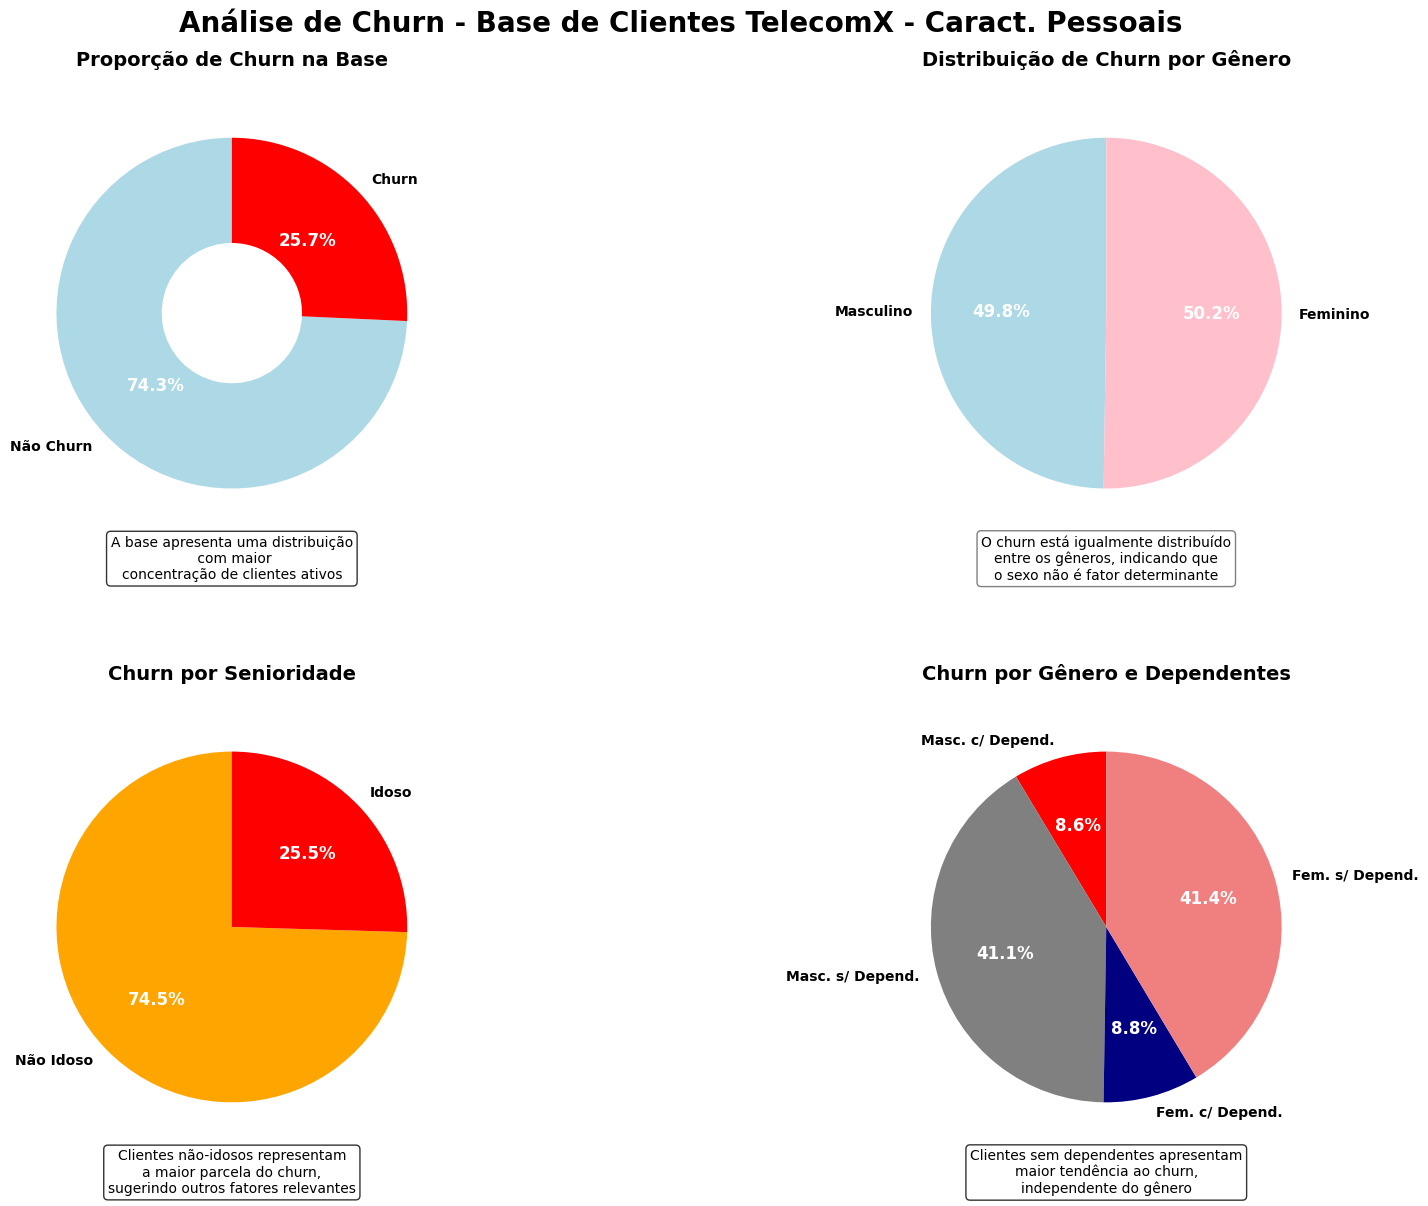

In [327]:
analise_caracteristicas_pessoais()

In [328]:
def analise_tempo_de_base():
  # Dados do churn por tempo de base (já calculados)
  cros_churn_TempoBase = round(df_telecomx[['Churn','TempoBase']].value_counts(normalize=True) * 100, 2)
  cros_churn_TempoBase = cros_churn_TempoBase.loc[('Yes')]
  cros_churn_ordenado = cros_churn_TempoBase.reindex(ordemdotempo)

  # Configuração da paleta de cores profissional em tons pastel
  #cores_pastel = ['#A8D8EA', '#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF']
  cores_pastel = ['#BAE1FF']
  # Configuração da figura
  plt.figure(figsize=(12, 8))
  plt.style.use('seaborn-v0_8-whitegrid')

  # Criação do gráfico de barras (histograma)
  bars = plt.bar(range(len(cros_churn_ordenado)),
                cros_churn_ordenado.values,
                color=cores_pastel,
                alpha=0.8,
                edgecolor='white',
                linewidth=1.5)

  # Personalização do gráfico
  plt.title('Distribuição do Churn por Tempo de Base\n',
            fontsize=16,
            fontweight='bold',
            pad=20,
            color='#2C3E50')

  plt.xlabel('Tempo de Base', fontsize=12, fontweight='bold', color='#34495E')
  plt.ylabel('Percentual de Churn (%)', fontsize=12, fontweight='bold', color='#34495E')

  # Configuração dos rótulos do eixo x
  plt.xticks(range(len(ordemdotempo)), ordemdotempo, rotation=45, ha='right', fontsize=10)
  plt.yticks(fontsize=10)

  # Adição dos valores nas barras
  for i, (bar, valor) in enumerate(zip(bars, cros_churn_ordenado.values)):
      altura = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2., altura + 0.1,
              f'{valor:.2f}%',
              ha='center', va='bottom',
              fontweight='bold',
              fontsize=10,
              color='#2C3E50')

  # Destacar as barras mais altas
  bars[0].set_color('#FF6B6B')  # Vermelho mais suave para destaque
  bars[3].set_color('#FF6B6B')  # Vermelho mais suave para destaque
  bars[5].set_color('#FF6B6B')  # Vermelho mais suave para destaque

  # Linha de referência para a média
  media_churn = cros_churn_ordenado.mean()
  plt.axhline(y=media_churn, color='#E74C3C', linestyle='--', alpha=0.7, linewidth=2)
  plt.text(len(ordemdotempo)-1, media_churn + 0.3,
          f'Média: {media_churn:.2f}%',
          ha='right',
          fontweight='bold',
          color='#000000')

  # Configuração do grid
  plt.grid(True, alpha=0.3, axis='y')

  # Ajuste do layout
  plt.tight_layout()

  # Adição da análise corrigida como anotação no meio do gráfico
  analise_texto = """ANÁLISE: A distribuição do churn por tempo de base revela uma concentração significativa
  nos primeiros 24 meses de permanência (18,32%), sendo extremamente alta no período inicial
  de até 4 meses (9,36%), representando mais de um terço do churn total.
  Observa-se uma tendência de redução nas faixas intermediárias, com posterior elevação
  após 36 meses (4,93%), sugerindo diferentes padrões de cancelamento ao longo do ciclo
  de vida do cliente."""

  plt.text(2.5, 7, analise_texto,
          fontsize=9,
          ha='center',
          va='center',
          wrap=True,
          bbox=dict(boxstyle="round,pad=0.5",
                    facecolor='#ECF0F1',
                    alpha=0.9,
                    edgecolor='#BDC3C7'),
          transform=plt.gca().transData)

  # Informação adicional no canto superior direito
  total_churn = cros_churn_ordenado.sum()
  plt.figtext(0.98, 0.95, f'Total de Churn na Base: {total_churn:.2f}%',
            fontsize=11,
            ha='right',
            va='top',
            fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3",
                      facecolor='#3498DB',
                      alpha=0.8,
                      edgecolor='white'),
            color='white')


  # Impressão dos dados para verificação
  print(f'Total de churn na base: {total_churn:.2f}%\n')
  print("Distribuição por faixa de tempo:")
  for tempo, valor in cros_churn_ordenado.items():
      print(f"{tempo}: {valor:.2f}%")

  return plt

Total de churn na base: 25.73%

Distribuição por faixa de tempo:
< 4 Meses: 9.36%
< 5 - 9 Meses: 3.34%
< 10 - 12 Meses: 1.57%
< 13 - 24 Meses: 4.05%
< 25 - 36 Meses: 2.48%
> 36 Meses: 4.93%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

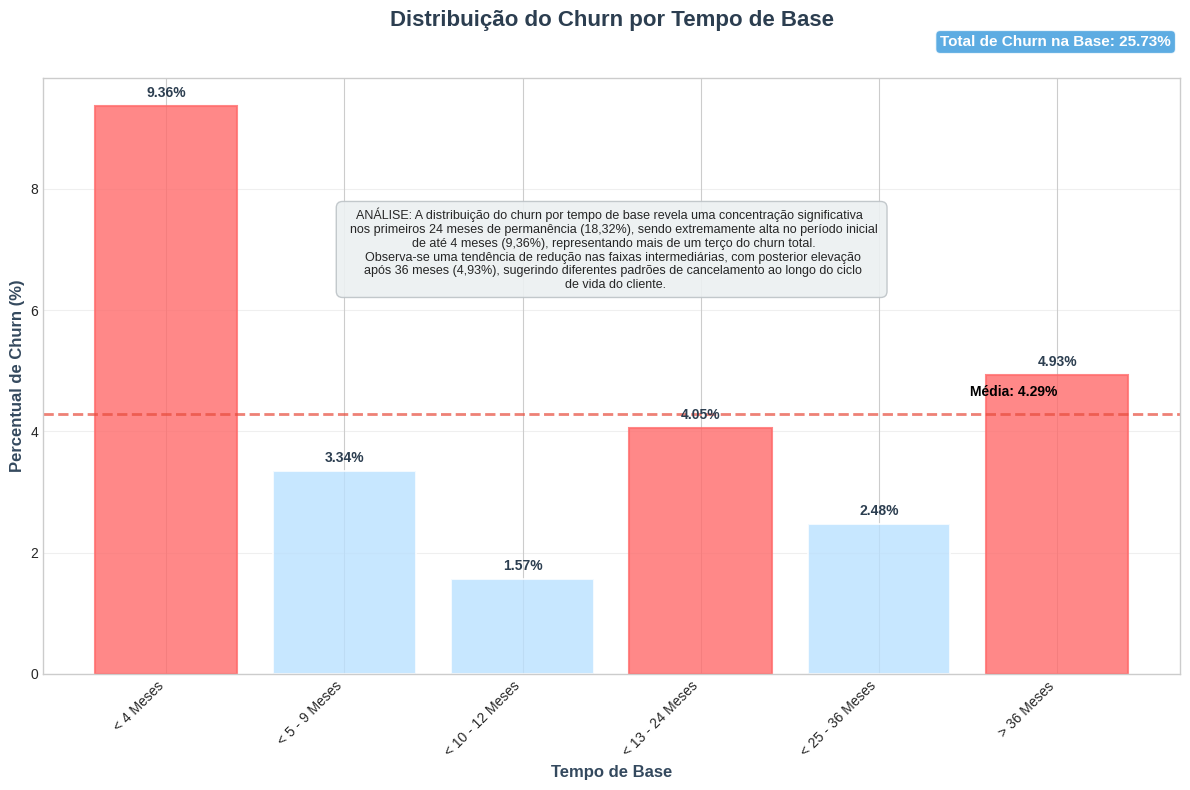

In [329]:
analise_tempo_de_base()

In [330]:

def tipodecontrato_tempodebase():
  # Configurar estilo
  plt.style.use('seaborn-v0_8-white')  # Mudança para 'white' em vez de 'whitegrid'
  sns.set_palette("pastel")

  # Dados para os gráficos (baseados nos resultados fornecidos)
  # Dados do gráfico de pizza - Percentuais de churn por tipo de contrato
  dados_pizza = {
      'Month-to-month': 22.78,
      'One year': 2.29,
      'Two year': 0.66
  }

  # Dados do gráfico de barras - Distribuição por tempo de base e contrato
  dados_distribuicao = {
      'TempoBase': ['< 4 Meses', '< 5 - 9 Meses', '< 10 - 12 Meses', '< 13 - 24 Meses', '< 25 - 36 Meses', '> 36 Meses'],
      'Month-to-month': [9.32, 3.29, 1.49, 3.83, 2.17, 2.68],
      'One year': [0.04, 0.06, 0.08, 0.22, 0.28, 1.61],
      'Two year': [0.0, 0.0, 0.0, 0.0, 0.03, 0.63]  # NaN convertido para 0.0
  }

  # Criar DataFrame para o segundo gráfico
  df_distribuicao = pd.DataFrame(dados_distribuicao)
  df_distribuicao = df_distribuicao.set_index('TempoBase')

  # Definir paleta de cores pastel profissional
  cores_pastel = ['#A8DADC', '#F1FAEE', '#E63946']  # Azul claro, branco cremoso, vermelho suave
  cores_pastel_pie = ['#457B9D', '#F1FAEE', '#E63946']  # Tons mais definidos para pizza

  # Criar figura com 2 subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
  fig.suptitle('Análise de Churn: Tipo de Contrato vs Tempo de Base',
              fontsize=16, fontweight='bold', y=0.99)

  # Gráfico 1: Pizza - Percentuais de churn por tipo de contrato
  wedges, texts, autotexts = ax1.pie(dados_pizza.values(),
                                    labels=dados_pizza.keys(),
                                    autopct='%1.2f%%',
                                    startangle=90,
                                    colors=cores_pastel_pie,
                                    explode=(0.1, 0, 0))  # Destacar Month-to-month

  ax1.set_title('Distribuição do Churn por Tipo de Contrato\n\n(% do Total)',
                fontsize=12, fontweight='bold', pad=10)

  # Melhorar a formatação do texto
  for i, autotext in enumerate(autotexts):
      if i == 0:  # Month-to-month (maior fatia, fundo escuro)
          autotext.set_color('white')
      else:  # One year e Two year (cores mais claras)
          autotext.set_color('black')
      autotext.set_fontweight('bold')
      autotext.set_fontsize(10)

  # Gráfico 2: Barras agrupadas - Distribuição por tempo de base
  x = np.arange(len(df_distribuicao.index))
  width = 0.25

  bars1 = ax2.bar(x - width, df_distribuicao['Month-to-month'], width,
                  label='Month-to-month', color=cores_pastel[0], alpha=0.8)
  bars2 = ax2.bar(x, df_distribuicao['One year'], width,
                  label='One year', color=cores_pastel[1], alpha=0.8, edgecolor='gray')
  bars3 = ax2.bar(x + width, df_distribuicao['Two year'], width,
                  label='Two year', color=cores_pastel[2], alpha=0.8)

  ax2.set_xlabel('Tempo de Base', fontweight='bold')
  ax2.set_ylabel('Percentual de Churn (%)', fontweight='bold')
  ax2.set_title('Distribuição do Churn por Tempo de Base e Tipo de Contrato\n\n(% do Total)',
                fontsize=12, fontweight='bold')
  ax2.set_xticks(x)
  ax2.set_xticklabels(df_distribuicao.index, rotation=45, ha='right')
  ax2.legend(loc='upper right')
  # Remover grid e bordas superior e direita
  ax2.spines['top'].set_visible(False)
  ax2.spines['right'].set_visible(False)

  # Adicionar valores nas barras
  def adicionar_valores_barras(bars, ax):
      for bar in bars:
          height = bar.get_height()
          if height > 0:  # Só mostrar se valor > 0
              ax.annotate(f'{height:.2f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8, fontweight='bold')

  adicionar_valores_barras(bars1, ax2)
  adicionar_valores_barras(bars2, ax2)
  adicionar_valores_barras(bars3, ax2)

  # Ajustar layout
  plt.tight_layout()

  # Adicionar texto de análise no meio do gráfico de barras
  ax2.text(0.5, 0.7,
          'Análise: O contrato "Month-to-month" é responsável por 88,5% do churn total\n' +
          '(22,78/25,73), sendo predominante especialmente nas faixas iniciais (até 9 meses).\n' +
          'Esta modalidade contratual concentra o maior risco de cancelamento, enquanto\n' +
          'contratos de longo prazo ("One year" e "Two year") apresentam taxas\n' +
          'significativamente menores de churn.',
          transform=ax2.transAxes, ha='center', va='top', fontsize=10, style='italic',
          bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.7))

  plt.subplots_adjust(bottom=0.15, top=0.85)


  # Estatísticas complementares
  print("=" * 60)
  print("RESUMO ESTATÍSTICO DA ANÁLISE DE CHURN")
  print("=" * 60)
  print(f"Total de churn: {sum(dados_pizza.values()):.2f}%")
  print(f"Participação Month-to-month no churn total: {(dados_pizza['Month-to-month']/sum(dados_pizza.values()))*100:.1f}%")
  print(f"Participação One year no churn total: {(dados_pizza['One year']/sum(dados_pizza.values()))*100:.1f}%")
  print(f"Participação Two year no churn total: {(dados_pizza['Two year']/sum(dados_pizza.values()))*100:.1f}%")
  print("\nConcentração por faixa de tempo (Month-to-month):")
  month_to_month_valores = df_distribuicao['Month-to-month']
  for i, valor in enumerate(month_to_month_valores):
      if valor > 0:
          print(f"  {df_distribuicao.index[i]}: {valor:.2f}% ({(valor/dados_pizza['Month-to-month'])*100:.1f}% do total Month-to-month)")
  return plt

RESUMO ESTATÍSTICO DA ANÁLISE DE CHURN
Total de churn: 25.73%
Participação Month-to-month no churn total: 88.5%
Participação One year no churn total: 8.9%
Participação Two year no churn total: 2.6%

Concentração por faixa de tempo (Month-to-month):
  < 4 Meses: 9.32% (40.9% do total Month-to-month)
  < 5 - 9 Meses: 3.29% (14.4% do total Month-to-month)
  < 10 - 12 Meses: 1.49% (6.5% do total Month-to-month)
  < 13 - 24 Meses: 3.83% (16.8% do total Month-to-month)
  < 25 - 36 Meses: 2.17% (9.5% do total Month-to-month)
  > 36 Meses: 2.68% (11.8% do total Month-to-month)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

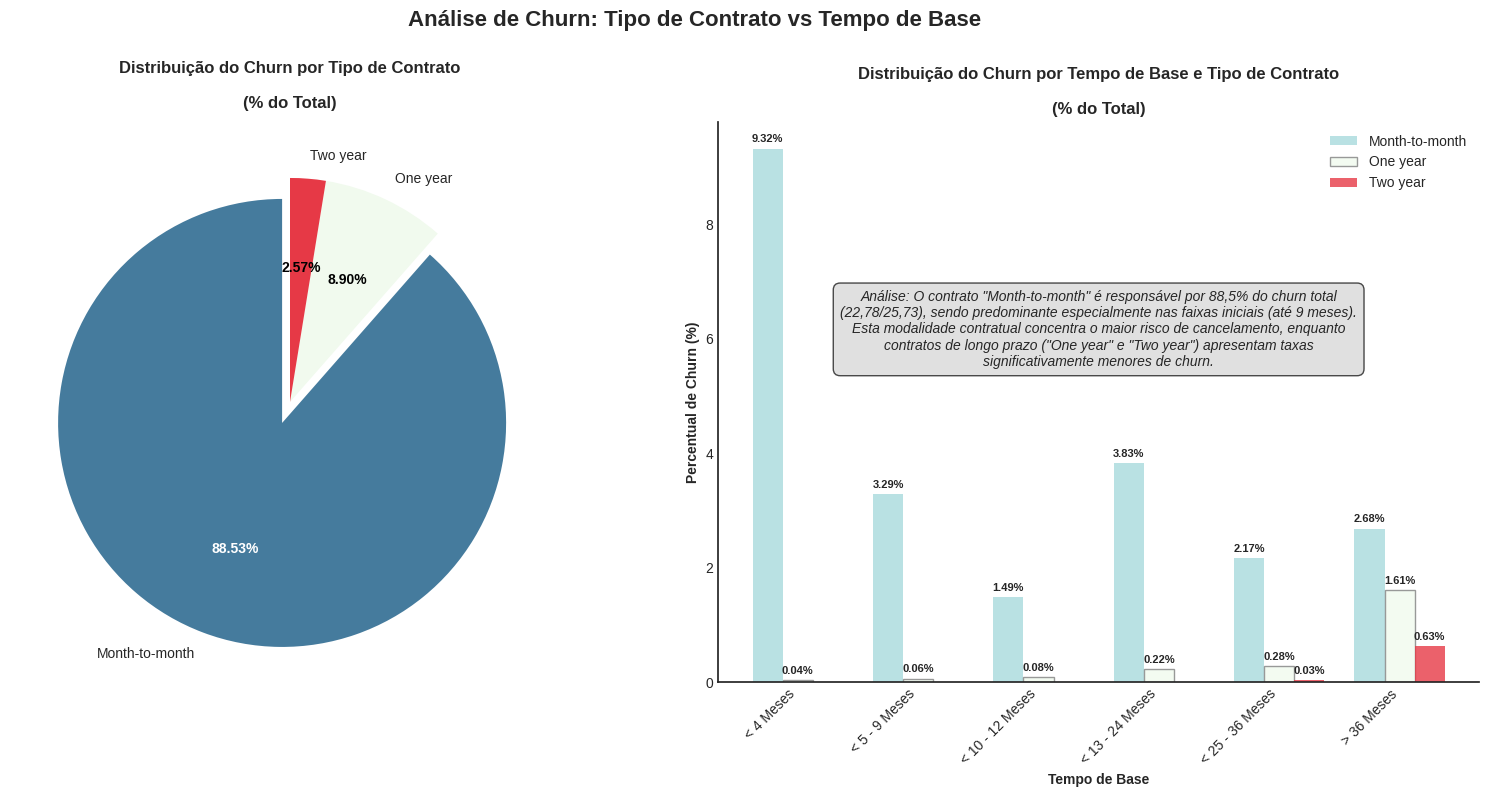

In [331]:
tipodecontrato_tempodebase()

In [332]:
def churn_por_Serviços_Tempo_Base():
  # Configuração da paleta de cores profissional em tons pastel
  plt.style.use('default')
  colors_phone = ['#A8DADC', '#E76F51']  # Azul pastel e coral pastel
  colors_internet = ['#A8DADC', '#E76F51', '#81B29A']  # Azul pastel, coral pastel e verde pastel
  colors_heatmap = plt.cm.RdYlBu_r  # Paleta reversa para melhor visualização

  # Dados dos gráficos de pizza
  phone_data = [2.33, 23.37]
  phone_labels = ['No', 'Yes']

  internet_data = [6.32, 17.85, 1.55]
  internet_labels = ['DSL', 'Fiber optic', 'No']

  # Dados do gráfico de distribuição
  distribution_data = np.array([
      [3.01, 5.34, 1.00],
      [0.80, 2.37, 0.18],
      [0.32, 1.17, 0.08],
      [0.91, 3.01, 0.12],
      [0.33, 2.08, 0.07],
      [0.95, 3.88, 0.10]
  ])

  tempo_labels = ['< 4 Meses', '< 5 - 9 Meses', '< 10 - 12 Meses',
                  '< 13 - 24 Meses', '< 25 - 36 Meses', '> 36 Meses']
  internet_service_labels = ['DSL', 'Fiber optic', 'No']

  # Criar figura com subplots
  fig = plt.figure(figsize=(16, 12))

  # Gráfico 1 - Pizza PhoneService
  ax1 = plt.subplot(2, 2, 1)
  wedges1, texts1, autotexts1 = ax1.pie(phone_data, labels=phone_labels, autopct='%1.2f%%',
                                        colors=colors_phone, startangle=90,
                                        textprops={'fontsize': 11, 'fontweight': 'bold'})
  ax1.set_title('Percentual de Churn por PhoneService', fontsize=14, fontweight='bold', pad=15)

  # Ajustar cores dos textos
  for autotext in autotexts1:
      autotext.set_color('white')
      autotext.set_fontweight('bold')

  # Gráfico 2 - Pizza InternetService
  ax2 = plt.subplot(2, 2, 2)
  wedges2, texts2, autotexts2 = ax2.pie(internet_data, labels=internet_labels, autopct='%1.2f%%',
                                        colors=colors_internet, startangle=90,
                                        textprops={'fontsize': 11, 'fontweight': 'bold'})
  ax2.set_title('Percentual de Churn por InternetService', fontsize=14, fontweight='bold', pad=15)

  # Ajustar cores dos textos
  for autotext in autotexts2:
      autotext.set_color('white')
      autotext.set_fontweight('bold')

  # Gráfico 3 - Gráfico de Barras Agrupadas
  ax3 = plt.subplot(2, 1, 2)

  # Configurar posições das barras
  x = np.arange(len(tempo_labels))
  width = 0.25

  # Criar barras para cada tipo de serviço
  bars1 = ax3.bar(x - width, distribution_data[:, 0], width, label='DSL',
                  color=colors_internet[0], alpha=0.8, edgecolor='white', linewidth=1)
  bars2 = ax3.bar(x, distribution_data[:, 1], width, label='Fiber optic',
                  color=colors_internet[1], alpha=0.8, edgecolor='white', linewidth=1)
  bars3 = ax3.bar(x + width, distribution_data[:, 2], width, label='No',
                  color=colors_internet[2], alpha=0.8, edgecolor='white', linewidth=1)

  # Adicionar valores nas barras
  def add_value_labels(bars):
      for bar in bars:
          height = bar.get_height()
          if height > 0:
              ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                      f'{height:.2f}%', ha='center', va='bottom',
                      fontweight='bold', fontsize=9)

  add_value_labels(bars1)
  add_value_labels(bars2)
  add_value_labels(bars3)

  # Configurar eixos
  ax3.set_xlabel('Tempo de Base', fontsize=12, fontweight='bold')
  ax3.set_ylabel('Percentual de Churn (%)', fontsize=12, fontweight='bold')
  ax3.set_title('Distribuição de Churn por Tempo de Base e InternetService (%)',
                fontsize=14, fontweight='bold', pad=20)
  ax3.set_xticks(x)
  ax3.set_xticklabels(tempo_labels, fontsize=10, rotation=45, ha='right')
  ax3.legend(loc='upper right', fontsize=11, framealpha=0.9)

  # Configurar grid
  # Remover linhas do topo e direita, e grid
  ax2.spines['top'].set_visible(False)
  ax2.spines['right'].set_visible(False)
  ax2.grid(False)


  # Adicionar anotação de análise
  ax3.text(0.5, 4.5, 'ANÁLISE:\nMaior concentração de churn\nnos primeiros 4 meses,\nespecialmente em\nFiber optic (5.34%)',
          bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.95, edgecolor='gray'),
          horizontalalignment='left', verticalalignment='center',
          fontsize=11, fontweight='bold', color='#2F4F4F')

  # Ajustar layout
  plt.tight_layout(pad=3.0)

  # Adicionar título geral
  fig.suptitle('Análise de Churn por Serviços e Tempo de Base',
              fontsize=16, fontweight='bold', y=0.989)


  # Imprimir resumo dos dados
  print("="*60)
  print("RESUMO DA ANÁLISE DE CHURN")
  print("="*60)
  print(f"Total de churn PhoneService: {sum(phone_data):.2f}%")
  print(f"Total de churn InternetService: {sum(internet_data):.2f}%")
  print(f"Maior concentração: Fiber optic nos primeiros 4 meses ({distribution_data[0,1]:.2f}%)")
  print("="*60)

  return plt

RESUMO DA ANÁLISE DE CHURN
Total de churn PhoneService: 25.70%
Total de churn InternetService: 25.72%
Maior concentração: Fiber optic nos primeiros 4 meses (5.34%)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

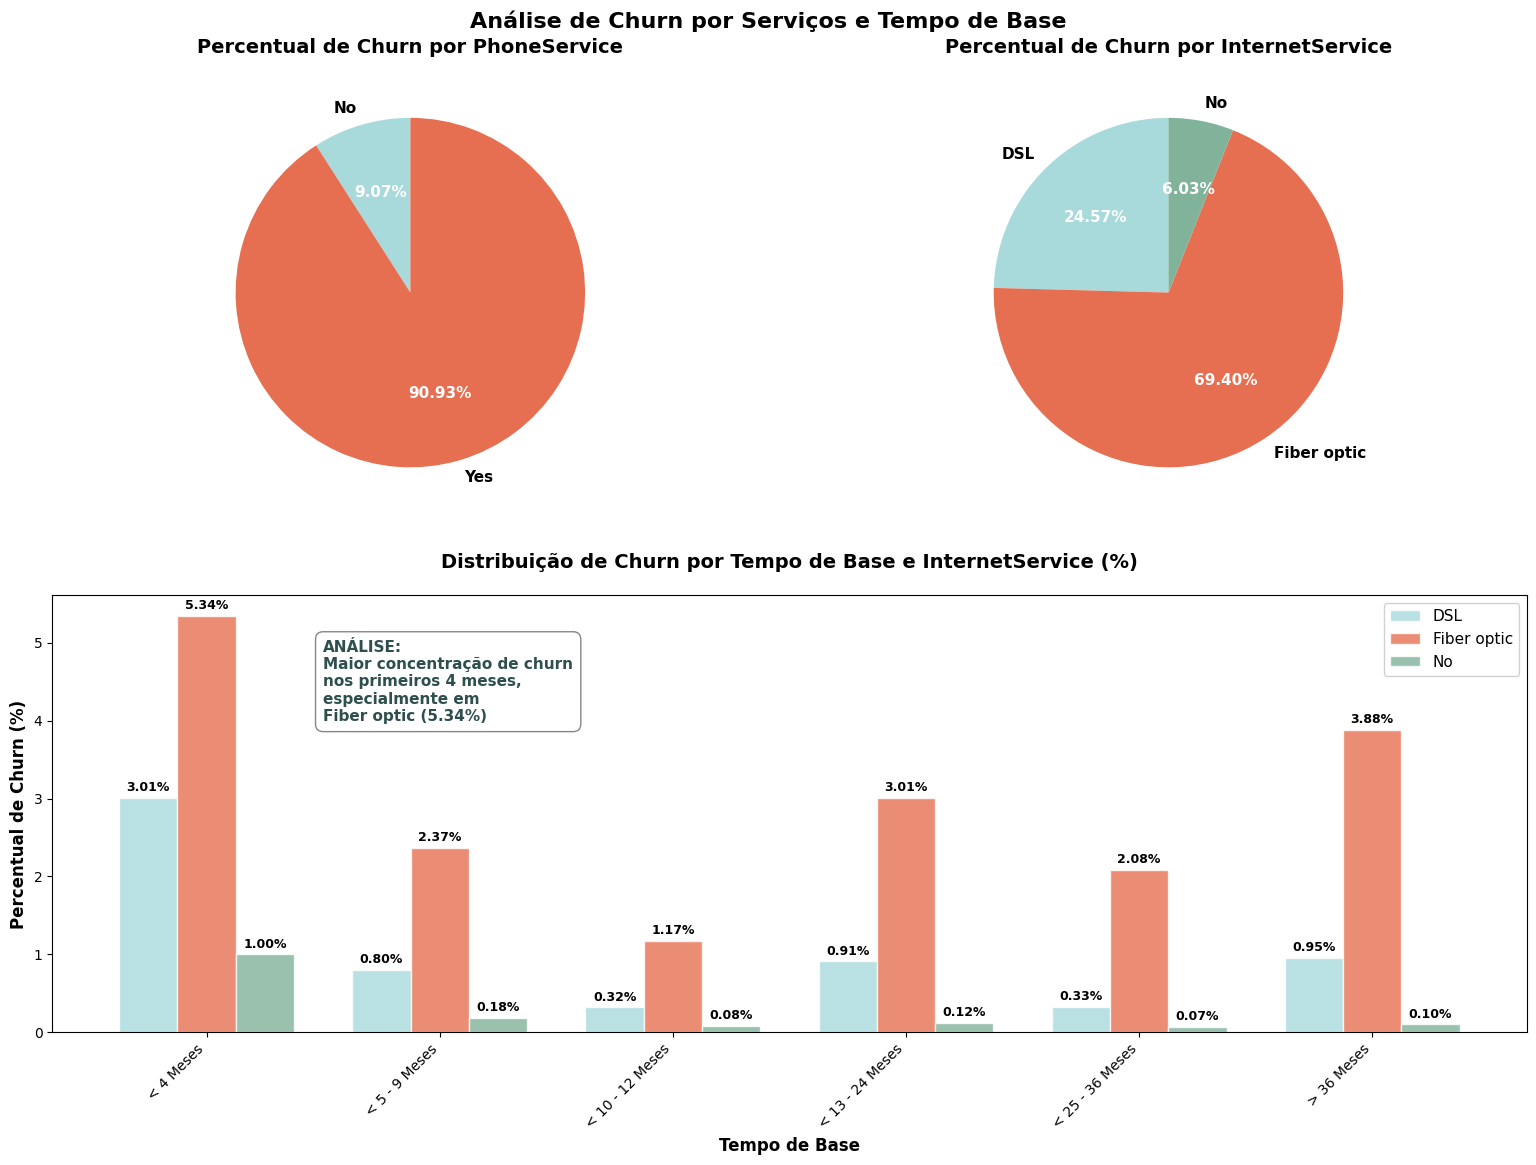

In [333]:
churn_por_Serviços_Tempo_Base()

In [334]:
def tempodebase_pagamentos():
  # Dados para o gráfico de pizza
  churn_por_pagamento = {
      'Bank transfer (automatic)': 3.56,
      'Credit card (automatic)': 3.19,
      'Electronic check': 14.72,
      'Mailed check': 4.24
  }

  # Dados para o gráfico de barras
  dados_tempo_base = {
      'Mailed check': [2.57, 0.61, 0.22, 0.40, 0.23, 0.21],
      'Electronic check': [5.50, 1.94, 0.89, 2.53, 1.44, 2.42],
      'Credit card (automatic)': [0.59, 0.34, 0.18, 0.58, 0.40, 1.10],
      'Bank transfer (automatic)': [0.69, 0.45, 0.28, 0.54, 0.40, 1.20]
  }

  # Configuração da figura
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
  fig.suptitle('Análise de Churn por Método de Pagamento', fontsize=16, fontweight='bold', y=0.99)

  # Paleta de cores profissional
  cores_profissionais = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
  cores_pizza = ['#2E86AB', '#A23B72', '#C73E1D', '#F18F01']  # Electronic check em vermelho

  # Gráfico 1: Pizza - Percentuais de churn por tipo de pagamento
  labels = list(churn_por_pagamento.keys())
  valores = list(churn_por_pagamento.values())

  # Destacar Electronic check em vermelho
  explode = (0, 0, 0.1, 0)  # Explode Electronic check

  wedges, texts, autotexts = ax1.pie(valores, labels=labels, colors=cores_pizza, autopct='%1.2f%%',
                                    startangle=90, explode=explode, shadow=True)

  # Melhorar formatação do texto
  for autotext in autotexts:
      autotext.set_color('white')
      autotext.set_fontweight('bold')
      autotext.set_fontsize(10)

  for text in texts:
      text.set_fontsize(9)

  ax1.set_title('Percentuais de Churn por Método de Pagamento', fontsize=12, fontweight='bold', pad=10)

  # Gráfico 2: Barras - Distribuição por tempo de base
  x = np.arange(len(ordemdotempo))
  width = 0.2

  # Plotar barras para cada método de pagamento
  for i, (metodo, valores) in enumerate(dados_tempo_base.items()):
      offset = (i - 1.5) * width
      bars = ax2.bar(x + offset, valores, width, label=metodo, color=cores_profissionais[i], alpha=0.8)

      # Adicionar valores nas barras
      for bar, valor in zip(bars, valores):
          if valor > 0.5:  # Só mostrar valores maiores que 0.5 para não poluir
              ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.05,
                      f'{valor:.2f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

  ax2.set_xlabel('Tempo de Base', fontsize=11, fontweight='bold')
  ax2.set_ylabel('Percentual de Churn (%)', fontsize=11, fontweight='bold')
  ax2.set_title('Distribuição de Churn por Método de Pagamento e Tempo de Base', fontsize=12, fontweight='bold')
  ax2.set_xticks(x)
  ax2.set_xticklabels(ordemdotempo, rotation=45, ha='right')
  ax2.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

  # Remover linhas do topo e direita, e grid
  ax2.spines['top'].set_visible(False)
  ax2.spines['right'].set_visible(False)
  ax2.grid(False)

  # Ajustar layout
  plt.tight_layout()
  plt.subplots_adjust(top=0.92)

  # Adicionar nota explicativa
  fig.text(0.02, 0.02, 'Nota: Electronic check apresenta o maior percentual de churn (14.72%)',
          fontsize=10, style='italic', color='#C73E1D')

  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

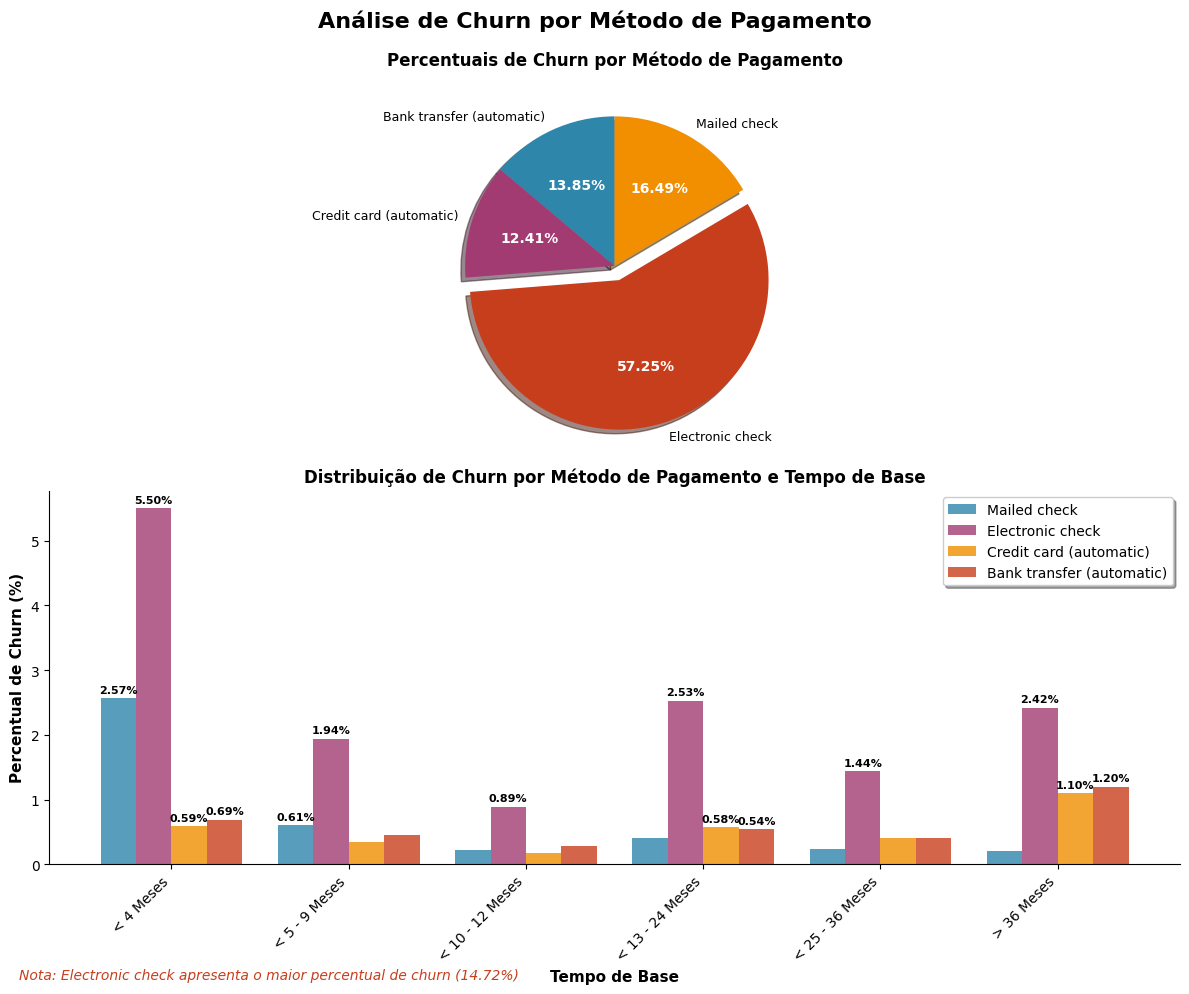

In [335]:
tempodebase_pagamentos()

In [336]:
def valor_tempodebase():

  # Dados fornecidos
  total_charges_churn = 74.44
  total_charges_no_churn = 61.35

  # Dados da tabela cruzada
  data = {
      'No': [44.12, 51.24, 48.32, 54.78, 60.64, 69.69],
      'Yes': [62.19, 73.48, 77.26, 78.51, 84.27, 89.18]
  }

  # Configuração do gráfico
  fig, ax = plt.subplots(figsize=(14, 8))

  # Posições das barras
  x = np.arange(len(ordemdotempo))
  width = 0.35

  # Paleta de cores profissional
  cor_no_churn = '#ADD8E6'    # Verde escuro profissional
  cor_churn = '#DC143C'       # Vermelho profissional

  # Criação das barras
  bars1 = ax.bar(x - width/2, data['No'], width, label='Não Churn', color=cor_no_churn, alpha=0.8)
  bars2 = ax.bar(x + width/2, data['Yes'], width, label='Churn', color=cor_churn, alpha=0.8)

  # Linhas das médias gerais
  ax.axhline(y=total_charges_no_churn, color=cor_no_churn, linestyle='--', linewidth=2,
            label=f'Média Geral Não Churn: ${total_charges_no_churn}')
  ax.axhline(y=total_charges_churn, color=cor_churn, linestyle='--', linewidth=2,
            label=f'Média Geral Churn: ${total_charges_churn}')

  # Adição de valores nas barras
  for bars in [bars1, bars2]:
      for bar in bars:
          height = bar.get_height()
          ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                  f'${height:.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

  # Configurações do gráfico
  ax.set_xlabel('Tempo de Base', fontsize=12, fontweight='bold')
  ax.set_ylabel('Valor Médio Mensal ($)', fontsize=12, fontweight='bold')
  ax.set_title('Análise de Valores Médios por Tempo de Base e Propensão ao Churn',
              fontsize=14, fontweight='bold', pad=20)
  ax.set_xticks(x)
  ax.set_xticklabels(ordemdotempo, rotation=45, ha='right')

  # Remover bordas superiores e direitas, sem grid
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.grid(False)

  # Legenda
  ax.legend(loc='upper left', frameon=False, fontsize=10)

  # Anotação explicativa
  annotation_text = ("INSIGHTS PRINCIPAIS:\n"
                    "1) VALOR x CHURN: Clientes com churn pagam em média $13 a mais mensalmente\n"
                    "2) VALOR x TEMPO: Valores crescem com o tempo de base, mas gap churn/não-churn se mantém")

  ax.text(0.25, 0.985, annotation_text, transform=ax.transAxes, fontsize=10,
          verticalalignment='center', bbox=dict(boxstyle='round,pad=0.5',
          facecolor='lightgray', alpha=0.8), fontweight='bold')

  # Ajustar layout
  plt.tight_layout()

  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

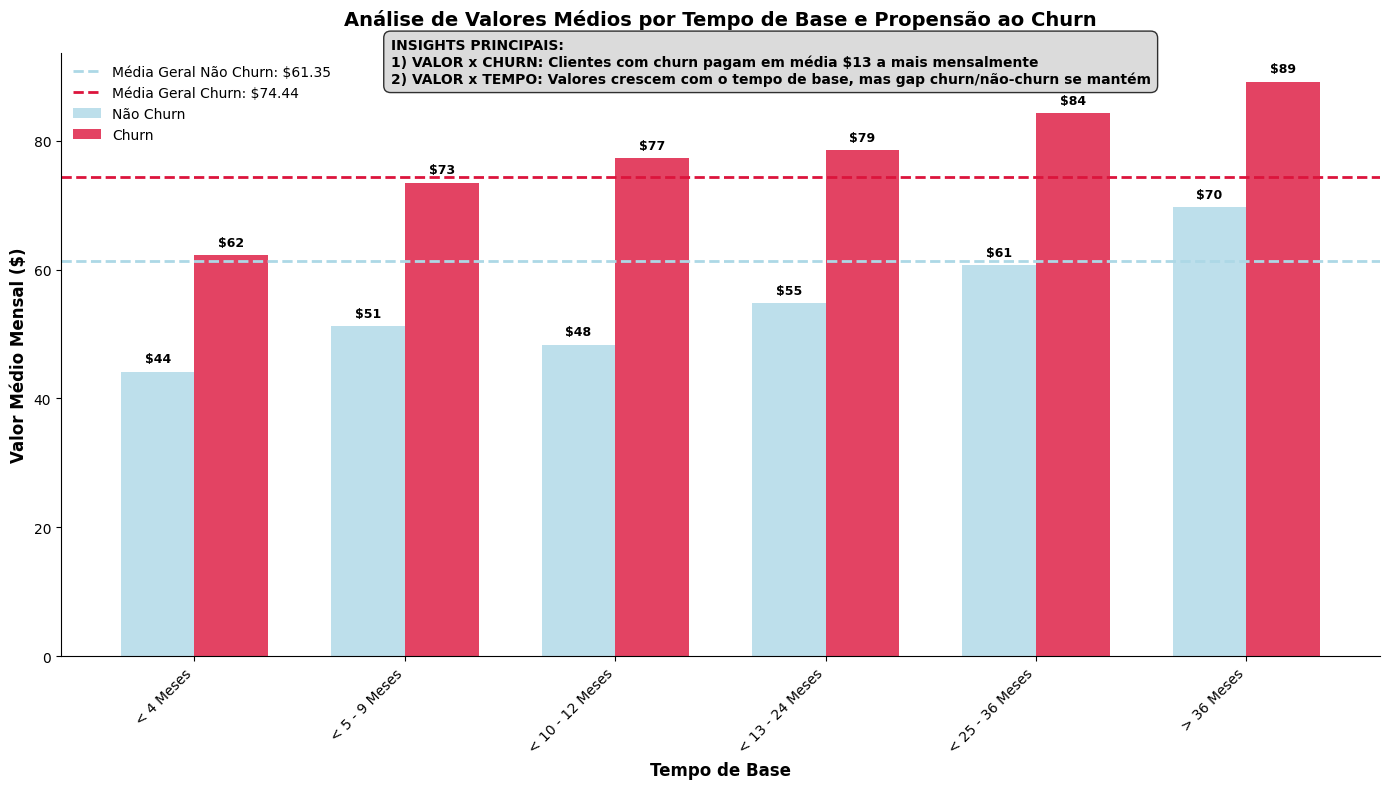

In [337]:
valor_tempodebase()

In [338]:
def salvar_grafico(grafico, nome):
    imagem = grafico()
    imagem.savefig(f'{nome}.png', bbox_inches='tight')
    imagem.close()

# Substitua as chamadas de função e nomes conforme necessário
salvar_grafico(analise_caracteristicas_pessoais, 'grafico_analise_caracteristicas_pessoais')
salvar_grafico(analise_tempo_de_base, 'grafico_analise_tempo_de_base')
salvar_grafico(tipodecontrato_tempodebase, 'grafico_tipodecontrato_tempodebase')
salvar_grafico(churn_por_Serviços_Tempo_Base, 'grafico_churn_por_Serviços_Tempo_Base')
salvar_grafico(tempodebase_pagamentos, 'grafico_tempodebase_pagamentos')





Valores calculados:
Proporção de churn na base: Churn
No     74.28
Yes    25.72
Name: proportion, dtype: float64
Churn por gênero: gender
Female    50.24
Male      49.76
Name: proportion, dtype: float64
Churn por senioridade: SeniorCitizen
0    74.531835
1    25.468165
Name: proportion, dtype: float64
Churn por dependentes e gênero: gender  Dependents
Female  No            41.41
        Yes            8.83
Male    No            41.14
        Yes            8.61
dtype: float64
Total de churn na base: 25.73%

Distribuição por faixa de tempo:
< 4 Meses: 9.36%
< 5 - 9 Meses: 3.34%
< 10 - 12 Meses: 1.57%
< 13 - 24 Meses: 4.05%
< 25 - 36 Meses: 2.48%
> 36 Meses: 4.93%
RESUMO ESTATÍSTICO DA ANÁLISE DE CHURN
Total de churn: 25.73%
Participação Month-to-month no churn total: 88.5%
Participação One year no churn total: 8.9%
Participação Two year no churn total: 2.6%

Concentração por faixa de tempo (Month-to-month):
  < 4 Meses: 9.32% (40.9% do total Month-to-month)
  < 5 - 9 Meses: 3.29% (14.4%